In [1]:
from sklearn import datasets, tree
import numpy as np

iris = datasets.load_iris()
raw_data = iris.data
target = iris.target
data=raw_data[:,[2,3]]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

[Text(167.4, 199.32, 'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(136.96363636363637, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(197.83636363636364, 163.07999999999998, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(121.74545454545455, 126.83999999999999, 'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(60.872727272727275, 90.6, 'X[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(30.436363636363637, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(91.30909090909091, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(182.61818181818182, 90.6, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(152.1818181818182, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(213.05454545454546, 54.359999999999985, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(182.61818

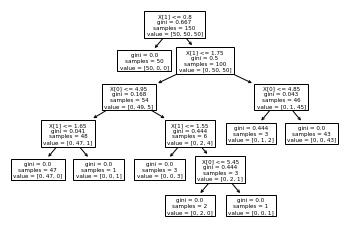

In [2]:
tree.plot_tree(clf) 

In [3]:
import graphviz 
import collections
import pydotplus

dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names[2:4],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('dodgerblue', 'darkorange', 'lightgreen', 'white')
edges = collections.defaultdict(list)
nodes = graph.get_node_list()
for node in nodes:
    if node.get_name() not in ('node', 'edge'):
        values = clf.tree_.value[int(node.get_name())][0]
        #color only nodes where only one class is present
        if max(values) == sum(values):    
            node.set_fillcolor(colors[np.argmax(values)])
        #mixed nodes get the default color
        else:
            node.set_fillcolor(colors[-1])
            
            

graph.write_pdf("results/iris_23_decision_tree_graphiz.pdf")



True

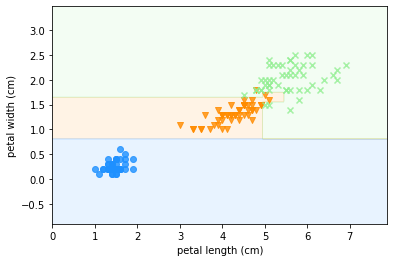

In [4]:
from classification_viz import plot_decisions_2d
import matplotlib.pyplot as plt
plot_decisions_2d(data, target, clf)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.savefig("results/iris_23_decision_tree_quadrangles.pdf")

# Investigation of the Impure Leaf
The decision tree has one node that is not pure, but that is also not further split. Why is that?
Theoretically, the node could have been split further using a new condition on the features. 

Explanation: There are no possible feature-based splits that actually split. In other words, the instances in the node share the same features, but belong to different classes.

Let's confirm that and find the respective points

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(data, columns=iris.feature_names[2:4])
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [7]:
df.shape

(150, 2)

Let's use the descriptive property of the descision tree to locate the three elements in the respective leaf:

In [8]:
leaf_df=df[
    (df['petal length (cm)']>2.45) & 
    (df['petal width (cm)']>1.75) &
    (df['petal length (cm)']<=4.85)
]
leaf_df

,petal length (cm),petal width (cm)
70,4.8,1.8
126,4.8,1.8
138,4.8,1.8


In [9]:
iris.target[leaf_df.index]

array([1, 2, 2])

We observe: the three instances (70, 126, 138) share the same features but 70 belongs to class 1, the others to class 2.